<div id="container" style="position:relative;">
<div style="float:left"><h1> Looking Ahead </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>


# Optimization

The subject of mathematical optimization gives us a wide range of options for optimizing our cost function.  Some of them require the functions to be mathematically well-behaved (e.g. differentiable), whereas others do not have very stringent requirements.

## Grid Search

The (conceptually) easiest way to search for a maximum or minimum across a discrete space is to search every possibility, and record whatever the largest/smallest value is.  For example, if we had to maximize a function `f(a,b)` over two arguments `a,b` where `a` had possible values `[1,2]` and `b` had possible values `[3,10]`, then we would compute each of the values `[f(1,3),f(1,10),f(2,3),f(2,10)]`, and find the max/min.  

Let's write a very simple gridsearch in Python with an example function:

In [2]:
# We'll assume there are two parameters, a and b.
# We have to define variables which will be the discrete values of each parameter we want to test

def gridsearch2(func,a_range,b_range):
    max = -np.inf
    a_value = None
    b_value = None
    for a in a_range:
        for b in b_range:
            if func(a,b) > max:
                max = func(a,b)
                a_value = a
                b_value = b
    return [a_value,b_value,max]

In [3]:
a_range = [1,2]
b_range = [3,10]
def function1(a,b):
    return np.exp(-a**2-b**2)

gridsearch2(function1,a_range,b_range)

[1, 3, 4.5399929762484854e-05]

So for the given function `function1(a,b)`$ = e^{-a^2-b^2}$ with `a` in `[1,2]`, `b` in `[3,10]`, the maximum of the function  occurs at `(a,b) = (1,3)` with value `function1(1,3)` $\cong 0.0000454$.

The problem with this method is that adding more parameters increases the number of computations required dramatically; for example, if we added another parameter `c` to the function `f(a,b)`, and `c` has possible values `[0,7,12]`, the total computations we'd need to make are:<br>
`[f(1,3,0),f(1,10,0),f(2,3,0),f(2,10,0),f(1,3,7),f(1,10,7),f(2,3,7),f(2,10,7),f(1,3,12),f(1,10,12),f(2,3,12),f(2,10,12)]`.<br>
We jumped from 4 computations to 12. Searching exhaustively becomes computationally very expensive, and so we look to other methods to shorten the amount of work we have to do.  These methods involve not searching the *entire* parameter space, but trying to find a smart "path" through it.

## Gradient Descent

Anyone who has taken an introductory course in calculus will remember that given a differentiable function $f:\,\mathbb{R}\to\mathbb{R}$, the locations of the maxima and minima of $f$ are given by the solutions to the equation
    $$ \frac{\text{d}}{\text{d}x}f(x) = 0. $$
For example, if $f(x) = x^2$, the solution to $0 = \frac{\text{d}}{\text{d}x}x^2 = 2x$ is the value $x=0$.  Further testing shows that this is a minimum of the function. When we have more complicated differentiable functions $f:\,\mathbb{R}^n\to\mathbb{R}$, we can use **gradient descent** as a way of finding paths to maximum/minimum values.  The gradient of a function is a vector of partial derivatives; e.g.: if $f:\mathbb{R}^3\to\mathbb{R}$, then the gradient of $f$ is

$$ \nabla f = \begin{bmatrix}\frac{\partial}{\partial x_1}f & \frac{\partial}{\partial x_2}f & \frac{\partial}{\partial x_3}f\end{bmatrix}$$

(In $\mathbb{R}^3$, we usually call $(x_1,x_2,x_3)=(x,y,z)$, but it's easier to enumerate over $x_i$ when the dimension increases.) In particular, the direction that the vector $\nabla f$ at the point $(x_1,x_2,x_3)$ along the steepest slope of $f$.  This means we can follow the gradient up, stepwise, towards a potential maximum, or follow $-\nabla f$ down towards a potential minimum. If we start at a point $\bf{a}_{(0)}\in \mathbb{R}^n$, then we can iterate along a path by choosing

$$  \bf{a}_{(n+1)} = \bf{a}_{(n)} - \alpha \nabla f(\bf{a}_{(n)}) $$

for a sufficiently small number $\alpha$.  This way, we follow the gradient "down" towards a possible minimum.

<img src="https://drive.google.com/uc?export=view&id=1pZ8twR7TcVdKTLL9qJpAToypMGU-c6vC" width="500" height="500" />

This concept is particularly important in neural networks, as the process of *back propagation* calculates the error contributions of neurons via gradient descent on the loss function.

We'll look at a quick example using SciPy's `optimize` package.

In [4]:
from scipy import optimize

We'll use the function $f(x) = x^4-2x-1$, guess that the minimum is at $x=0$ (we need to provide it with a starting point), and use the *nonlinear conjugate gradient method* (a numerical method approximating gradient descent):

In [5]:
def f(x):
    return x**4-2*x-1

In [6]:
optimize.fmin_cg(f,0)

Optimization terminated successfully.
         Current function value: -2.190551
         Iterations: 3
         Function evaluations: 24
         Gradient evaluations: 8


array([0.79370052])

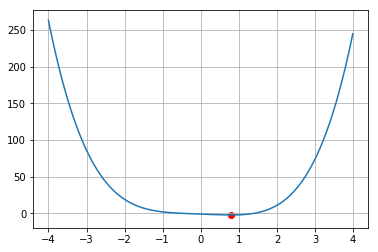

In [7]:
x = np.arange(-4,4,0.01)
plt.plot(x,f(x))
plt.scatter([0.79370052],[f(0.79370052)],color='red');
plt.grid()

# Random Forests

One very popular way to use decision trees is combining multiple trees in a *random forest*.  The input data to be classified is put through a number of different trees, each of which "votes" on what category it should be classified into, and the votes are tallied to give the final classification.  The trees in the forest are "grown" as follows:

1. Randomly sample from the original data the same number of cases as in the training set.
2. Choose a number much less than the number of input variables.  At each node, this number of variables are randomly selected and the node is split by the best division amongst the variables selected.  
3. The trees continue to grow in this method, unhindered, until the largest possible tree is constructed.

Random forests have become very popular choices for dealing with classification/regression on large data sets.  You can read more about the efficacy and success of random forests here: https://arxiv.org/pdf/1504.07676.pdf

In [15]:
an = pd.read_csv('animals.csv',index_col=0)
an

,Legs,Cold or Warm Blooded,Covering,Aquatic,Aerial,Lays Eggs,Category
Tree Frog,4,cold,none,partial,no,yes,amphibian
Cane Toad,4,cold,none,no,no,yes,amphibian
Ball Python,0,cold,scales,no,no,yes,reptile
Dove,2,warm,feathers,no,yes,yes,bird
Human,2,warm,hair,no,no,no,mammal
Lion,4,warm,fur,no,no,no,mammal
Chihuaha,4,warm,fur,no,no,no,mammal
Crow,2,warm,feathers,no,yes,yes,bird
Monitor Lizard,4,cold,none,no,no,yes,reptile
Veiled Chameleon,4,cold,scales,no,no,yes,reptile


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)
le = LabelEncoder()

In [17]:
an1 = (an[['Cold or Warm Blooded','Covering','Aquatic','Aerial','Lays Eggs']]).apply(lambda x: d[x.name].fit_transform(x))
an_encoded = pd.concat([an['Legs'],an1],axis=1)
an_encoded.head()

,Legs,Cold or Warm Blooded,Covering,Aquatic,Aerial,Lays Eggs
Tree Frog,4,0,3,1,0,1
Cane Toad,4,0,3,0,0,1
Ball Python,0,0,4,0,0,1
Dove,2,1,0,0,1,1
Human,2,1,2,0,0,0


When we make an instance of the `RandomForestClassifier` class, we can specify parameters like the number of trees in the forest (`n_estimators`, default 10), the maximum depth of the trees, the criterion used for splitting (default is `gini`), etc.  You can find the documentation here:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [18]:
clf = RandomForestClassifier(n_estimators=15,min_samples_split=2)
clf.fit(an_encoded, an['Category'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

We can test its predictive power on animals we've seen in the decision tree section:

In [19]:
naked_mole_rat = [[4,1,3,0,0,0]]
clf.predict(naked_mole_rat)

array(['mammal'], dtype=object)

In [20]:
giant_tortoise = [[4,0,4,0,0,1]]
clf.predict(giant_tortoise)

array(['reptile'], dtype=object)

And just like the single decision tree, the random forest was able to correctly identify both.  But the single tree had a problem trying to classify a platypus, which is a mammal but with strange properties.  How does the random forest fare with this example?

In [21]:
platypus = [[4,1,1,1,0,1]]
clf.predict(platypus)

array(['amphibian'], dtype=object)

**Question:** If we re-train the model and try again, what do we get?

We can visualize individual trees from the forest by looking through `clf.estimators_`

In [22]:
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=589500867, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1524264638, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# On Windows, Graphviz no longer adds itself to the PATH in Windows.  
# This code below accomplishes it (temporarily)
# import os     
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

If we take the first tree:

In [39]:
y = clf.estimators_[0]
y

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=589500867, splitter='best')

We notice the `y.classes_` attribute is not the class names themselves, but encoded numbers.  This means when we visualize, we will pass a list to `class_names`.

In [40]:
y.classes_

array([0., 1., 2., 3.])

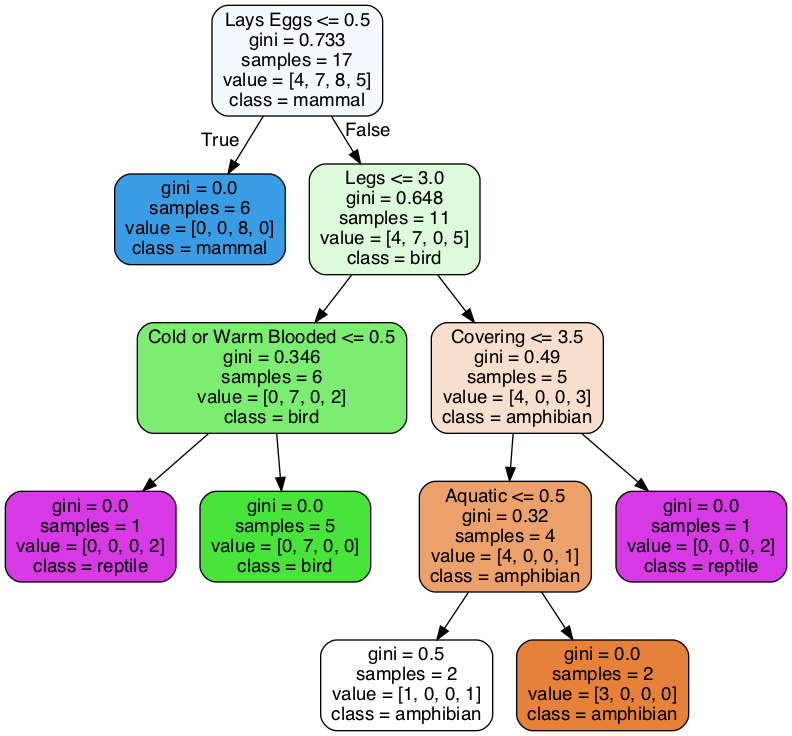

In [41]:
dot_data = StringIO()
export_graphviz(y, out_file=dot_data, feature_names=an_encoded.columns, class_names= ['amphibian','bird','mammal','reptile'], 
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Neural Networks

Neural networks get a lot of buzz when it comes to machine learning.  Broadly speaking, neural networks consist of a collection of *neurons* which take an input (a value as initial input, or from another neuron), and use a mathematical function to transform the value it has been given, before sending the new value forward to other neurons. 

The neurons are *layered* to show how they interact with each other.  Neurons in a particular layer will receive information from neurons in the previous layer; neurons in a layer will pass information forward to the next layer.  The first layer, where we can provide initial information is called the *input layer*; the final layer is called the *output layer*, where the processed information returns to us.  Any layers in between these are called *hidden layers*, because we don't observe the transformations happening.

<img src="https://drive.google.com/uc?export=view&id=1gCjJtdsF8560OIOGtYp_AXU__NCjnLAV" width="350" height="350" />  

(In actuality, this setup of network layers is called a *feed forward neural network*, because the information feeds forward through the layers; you can have more complicated setups in what are called *recurrent neural networks* that include cycles of information passing.)

Each neuron has an associated *weight* for every neuron that connects to it, which determines how much each of those neurons contributes.  Neurons also can have a *bias*, a constant factor that will adjust the value the neuron computes.  To illustrate, if we call the values that each of the input layer neurons have $a_1,\,a_2,\,a_3,\,a_4$, then the first hidden layer neuron has associated weights, $w_1,\,w_2,\,w_3,\,w_4$, for each of the input layers it is connected to:

<img src="https://drive.google.com/uc?export=view&id=1zfALfxzDylgj9wBK_OuVYwXaUath1r0-" width="350" height="350" />

If we call the bias for this neuron $b$, then the value this neuron will pass forward is (or is at least proportional to) the formula:
$$ w_1a_1 + w_2a_2 + w_3a_3 + w_4a_4 - b. $$
We say "proportional to", because often you will want the values that the neurons have to be normalized in some way, (e.g. you may want them to only take on values between 0 and 1).  In this case, we can wrap the entire computation in a function that will output values where we want, such as the sigmoid function we'd seen before:
$$ \sigma(w_1a_1 + w_2a_2 + w_3a_3 + w_4a_4 - b). $$

Given $m$ input neurons, and $n$ (first) hidden layer neurons, we can express the computations in a matrix equation:

$$ \begin{bmatrix}a_{1}^{(2)}\\a_{2}^{(2)}\\ \vdots \\ a_{n}^{(2)} \end{bmatrix} \quad=\quad 
\sigma \left( \,\begin{bmatrix} w_{1,1} & w_{1,2} & \ldots & w_{1,m} \\ 
 w_{2,1} & w_{2,2} & \ldots & w_{2,m} \\
\vdots & \vdots & \ddots & \vdots\\
 w_{n,1} & w_{n,2} & \ldots & w_{n,m}\end{bmatrix}
\begin{bmatrix}a_{1}^{(1)}\\a_{2}^{(1)}\\ \vdots \\ a_{m}^{(1)}\end{bmatrix} \quad-\quad \begin{bmatrix}b_1^{(1)}\\b_2^{(1)}\\ \vdots \\ b_n^{(1)} \end{bmatrix}\, \right)$$

Here, the superscript $(i)$ denotes neurons in the $i^{th}$ layer.  Also note that the function is applied component-wise. Condensing this, using boldface to denote a vector:
$$  \bf{a}^{(2)} = \sigma(\bf{W}\bf{a}^{(1)} - \bf{b}). $$

The values from this second layer are then passed along to the third layer in the same way, for the third layer's own set of weights and biases, continuing along until they reach the output layer.

## Uses

One of the main uses of neural networks is using a series of transformations on audio or image information to *learn* how to classify specific types of audio (e.g. speech) or images (e.g. rabbits).  We could, for example, attempt to train a neural network to recognize hand-written characters, like letters or numbers:

<img src="https://drive.google.com/uc?export=view&id=1mCBu67TxHxq4Pr7ugN__0h0ndnXeTnJ1" height="300" width="300" />

The process is, generally, as follows:

1. Start with a very large collection of monochrome images of hand-written characters.  
2. Take each image, and convert it into a sequence of numbers:  one number for each pixel in the picture, with the number representing how dark the pixel is, (closer to 0 if it's light, closer to 1 if it's dark).
3. Create a neural network where there are as many input layer neurons as input pixel values for the images, and as many output layer neurons for the different classes (e.g. 10 output neurons, one for each of 0,1,2,...,).  Decide how many hidden layers you want, and how many neurons for each layer.
4. Randomly chosen initial weights and biases will generally produce answers that don't resemble what you are looking for.  So as you feed it training data, create your cost function by averaging over the squared differences between the output values and the desired values (averaging over all of the training data).
5. Use gradient descent to find the optimal weights & biases that minimize the cost function.

At this point, you've created your classification model, and can test it by feeding it handwritten digits it has not yet seen.  This is what our example 4 looks like when we assign values to the pixels:

<img src="https://drive.google.com/uc?export=view&id=1dIKN9MunJmitVDfpdFKdRo_58LpLPz71" width="300" height = "300"/>

There are a few very popular packages for implemented neural networks:

1. [TensorFlow](https://www.tensorflow.org/) for Python is a package built to handle neural networks (amongst other things). They have a host of resources and [tutorials](https://www.tensorflow.org/tutorials) on their website.
2. PyTorch is more popular in academia, but is still quite widely used:
http://pytorch.org/tutorials/index.html <br/>
Examples to get started with can be found here:
http://pytorch.org/tutorials/beginner/pytorch_with_examples.html#

In fact, basic neural networks can be implemented solely in NumPy, but lack the ability to use GPUs for faster processing, and don't come with the pre-built tools for back-propagation.  Here is an example of a 2-layer NumPy neural network from the PyTorch examples page:

In [26]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 40163396.76996336
1 39703929.48155972
2 42371444.87551736
3 39362864.07517175
4 27798517.46274426
5 14948177.493173104
6 6919528.763289847
7 3441616.668924379
8 2074847.538380239
9 1486333.4799937806
10 1172432.4622647986
11 967843.9579396148
12 816641.5612577486
13 697617.7349700055
14 600728.270538833
15 520657.0099114959
16 453684.643514922
17 397303.41533150774
18 349445.5320692879
19 308597.8628088782
20 273500.3778013025
21 243238.7970662673
22 217019.040661333
23 194195.7765629682
24 174218.02362180984
25 156727.8117784525
26 141348.98872687222
27 127777.48960563034
28 115756.29769563534
29 105077.36534931896
30 95570.07914914808
31 87095.73010889348
32 79516.0725295839
33 72711.47735398525
34 66588.24355002286
35 61071.28895798506
36 56086.52093799316
37 51574.77355525238
38 47484.997556616596
39 43770.303962764
40 40392.33906251378
41 37316.40628416794
42 34509.8200084165
43 31945.867705425124
44 29600.818045621927
45 27454.75661510441
46 25491.457384293208
47 23690.54370644

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>